# Introduction to Matplotlib

## Introduction to data visualization with Matplotlib

Data visualization is a set of techniques designed to show data in a syntactic way. Is useful to indentify general patterns and tendecies of a data set. Patterns that we woudn't identify jus by looking each data point individually.

Data visualization is used also to share your data analysis results, in a way that the intended audience is able to understand.

### Using the matplotlib.pyplot interface

Matplotlib is the basic library for data visualization with Python. Its main advantage is that it gives you complete control over your plot properties. 

Matplotlib was created in 2003 by John D. Hunter.

In this project we'll use the main object oriented interface, contained in the `matplotlib.pyplot` submodule. 

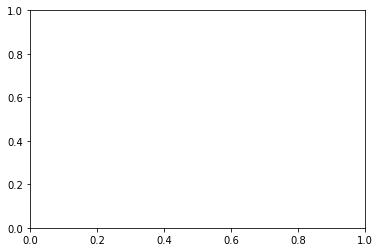

In [ ]:
# Import the matplotlib.pyplot API, using the conventional name plt
import matplotlib.pyplot as plt

# Create Figure and Axes objects using the plt.subplots function
fig, ax = plt.subplots()

# Show the results, an empty set of axes
plt.show()

### Adding data to an Axes object

In [11]:
import pandas as pd
import numpy as np

MONTH = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
seattle_weather = pd.read_csv('/work/data_science_notes/5. Introduction to data visualization with Matplotlib/data/seattle_weather.csv')
austin_weather = pd.read_csv('/work/data_science_notes/5. Introduction to data visualization with Matplotlib/data/austin_weather.csv')

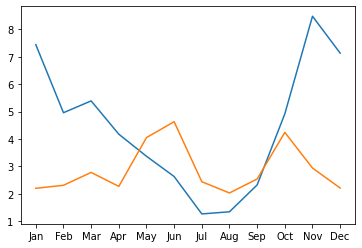

In [14]:
# Import the matplotlib.pyplot submodule as plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes object by calling plt.subplots
fig, ax = plt.subplots()

# Crate a plot of MLY_PRCP_NORMAL vs. MONTH for Seattle
ax.plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean())

# Crate a plot of MLY_PRCP_NORMAL vs. MONTH for Austin
ax.plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean())

# Set x-tick labels
ax.set_xticks(seattle_weather['DATE'].unique())
ax.set_xticklabels(MONTH)

plt.show()

## Customizing your plots

### Customizing data appearance

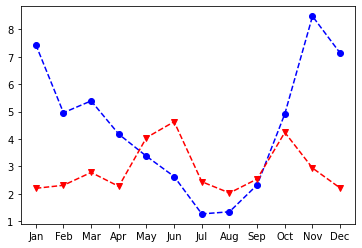

In [18]:
# Crate a plot of MLY_PRCP_NORMAL vs. MONTH in both DataFrames
# Set the color of the Seattle data to blue ('b') and the Austin data to red ('r')
# Set the Seattle data to circle markers and the Austin markers to triangles pointing downwards

fig, ax = plt.subplots()
ax.plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='b', marker='o', linestyle='--')
ax.plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='r', marker='v', linestyle='--')
ax.set_xticks(seattle_weather['DATE'].unique())
ax.set_xticklabels(MONTH)

plt.show()

### Customizing axis labels and adding titles

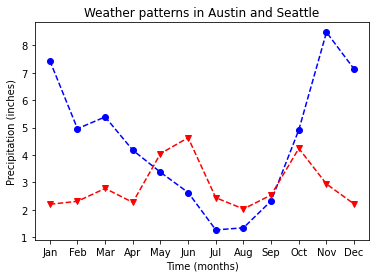

In [19]:
# Use the set_xlabel method to add the label: "Time (months)"
# Use the set_ylabel method to add the label: "Precipitation (inches)"
# Use the set_title method to add the title: "Weather patterns in Austin and Seattle"

fig, ax = plt.subplots()
ax.plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='b', marker='o', linestyle='--')
ax.plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='r', marker='v', linestyle='--')
ax.set_xticks(seattle_weather['DATE'].unique())
ax.set_xticklabels(MONTH)
ax.set_xlabel('Time (months)')
ax.set_ylabel('Precipitation (inches)')
ax.set_title('Weather patterns in Austin and Seattle')

plt.show()

## Small multiplies

### Creating small multiples with plt.subplots

Small multiples are used to plot several datasets side-by-side.

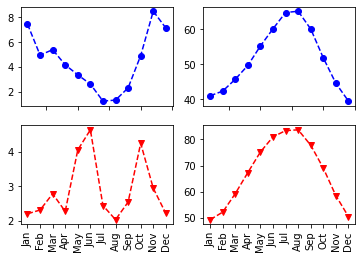

In [29]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes, plot the Seattle precipitation
ax[0,0].plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='b', marker='o', linestyle='--')

# In the top right, plot Seattle temperatures
ax[0,1].plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-TAVG-NORMAL'].mean(), color='b', marker='o', linestyle='--')

# In the bottom left and bottom right plot Austin precipitations and temperatures
ax[1,0].plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='r', marker='v', linestyle='--')
ax[1,1].plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-TAVG-NORMAL'].mean(), color='r', marker='v', linestyle='--')

# Set the x-axis tick labels
ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])
ax[1,0].set_xticks(seattle_weather['DATE'].unique())
ax[1,0].set_xticklabels(MONTH, rotation=90)
ax[1,1].set_xticks(seattle_weather['DATE'].unique())
ax[1,1].set_xticklabels(MONTH, rotation=90)

plt.show()

### Small multiples with shared y axis

When creating small multiples, it is often preferable to make sure that the different plots are displayed with the same scale used on the y-axis.

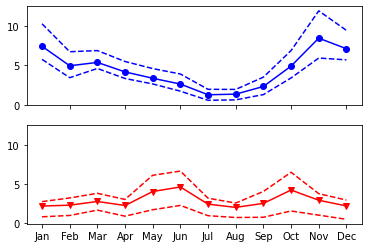

In [46]:
# Create a Figure with an array of two Axes objects that share their y-axis range
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle's "MLY-PRCP-NORMAL" in a solid blue line in the top Axes
ax[0].plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='b', marker='o')

# Add Seattle's "MLY-PRCP-25PCTL" and "MLY-PRCP-75PCTL" in dashed blue lines to the top Axes
ax[0].plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-25PCTL'].mean(), color='b', linestyle='--')
ax[0].plot(seattle_weather['DATE'].unique(), seattle_weather.groupby('DATE')['MLY-PRCP-75PCTL'].mean(), color='b', linestyle='--')

# Plot Austin's "MLY-PRCP-NORMAL" in a solid red line in the bottom Axes and the "MLY-PRCP-25PCTL" and "MLY-PRCP-75PCTL" in dashed red lines
ax[1].plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-NORMAL'].mean(), color='r', marker='v')
ax[1].plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-25PCTL'].mean(), color='r', linestyle='--')
ax[1].plot(austin_weather['DATE'].unique(), austin_weather.groupby('DATE')['MLY-PRCP-75PCTL'].mean(), color='r', linestyle='--')

# Set x-axis tick labels
ax[0].set_xticklabels([])
ax[1].set_xticks(austin_weather.DATE.unique())
ax[1].set_xticklabels(MONTH)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=15e4b2e7-b024-4f10-9d84-df57af421120' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>